![forb](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Forbes_logo.svg/768px-Forbes_logo.svg.png)

# Exploring Countries by Billionaires 💲

In this Kaggle notebook, we explore the world of billionaires, treating each billionaire as a unique 'country.' Forbes compiles the annual Forbes Billionaires List, a comprehensive collection of the world's wealthiest individuals, offering insights into their wealth, industries, and philanthropic endeavors. Our goal is to classify billionaires into 77 distinct 'countries' with an impressive 99% accuracy using advanced machine learning techniques and effective overfitting management through stacking.

Predicting the 'country' of each billionaire is our main task. We handle a target column with 77 unique classes representing diverse nationalities. Leveraging this rich dataset and machine learning, we uncover patterns, stories, and insights in the world of billionaires considered as individual 'countries.'

The Forbes Billionaires List, our machine learning achievements, and the classification of billionaires into 77 unique 'countries' create a captivating journey into the realm of billionaire data. Whether you're a data enthusiast, a curious mind, or an aspiring entrepreneur, this notebook offers a novel perspective on billionaires and their 'countries.' Let's delve into the data, harness machine learning, and discover the intriguing stories of these billionaire 'nations.

![image.png](https://static01.nyt.com/images/2013/11/16/business/FORBES/FORBES-superJumbo.jpg)

# Importing Libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from scipy.stats import zscore, boxcox
from pandasql import sqldf
from sklearn.preprocessing import LabelEncoder
import folium
from geopy import geocoders  
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import StackingClassifier
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
import os 
os.listdir('/kaggle/input/')

['billionaires-listed-in-forbes']

In [3]:
df = pd.read_csv("/kaggle/input/billionaires-listed-in-forbes/forbes_2640_billionaires.csv")
df.head()

,rank,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,Source of Wealth,Self-Made Score,Philanthropy Score,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,LVMH,NaN,NaN,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
1,2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,"Tesla, SpaceX, Self Made",8.0,1.0,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
2,3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,"Amazon, Self Made",8.0,2.0,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
3,4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,"Oracle, Self Made",9.0,1.0,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
4,5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,"Berkshire Hathaway, Self Made",8.0,5.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                2640 non-null   int64  
 1   name                2640 non-null   object 
 2   forbes_id           2640 non-null   object 
 3   net_worth           2640 non-null   float64
 4   age                 2575 non-null   float64
 5   age_range           2640 non-null   int64  
 6   country             2640 non-null   object 
 7   source              2640 non-null   object 
 8   industry            2640 non-null   object 
 9   Age                 2555 non-null   float64
 10  Source of Wealth    2639 non-null   object 
 11  Self-Made Score     558 non-null    float64
 12  Philanthropy Score  411 non-null    float64
 13  Residence           2581 non-null   object 
 14  Citizenship         2629 non-null   object 
 15  Marital Status      2089 non-null   object 
 16  Childr

In [5]:
# summary
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
rank,2640.0,1289.159091,739.693726,1.0,659.0,1312.0,1905.0,2540.0
net_worth,2640.0,4.623788,9.834241,1.0,1.5,2.3,4.2,211.0
age,2575.0,65.138641,13.258934,18.0,56.0,65.0,75.0,101.0
age_range,2640.0,6.782955,1.722357,0.0,6.0,7.0,8.0,11.0
Age,2555.0,65.457143,13.245204,19.0,56.0,66.0,75.0,101.0
Self-Made Score,558.0,6.586022,2.644520,1.0,5.0,8.0,8.0,10.0
Philanthropy Score,411.0,1.927007,1.021489,1.0,1.0,2.0,2.0,5.0
Children,1598.0,2.969337,1.675171,1.0,2.0,3.0,4.0,23.0
Bachelor,1416.0,0.686441,0.464103,0.0,0.0,1.0,1.0,1.0
Master,1416.0,0.370056,0.482990,0.0,0.0,0.0,1.0,1.0


In [6]:
df['Residence'] = df.Residence.str.split(',').str.get(0)

In [7]:
df.head(1)

,rank,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,Source of Wealth,Self-Made Score,Philanthropy Score,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,LVMH,NaN,NaN,Paris,France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0


# Billionaire's by Country

![blr](https://thehill.com/wp-content/uploads/sites/2/2020/10/ca_billionaires_money_istock.jpg?w=876&h=493&crop=1)

In [8]:
import plotly.express as px

# Assuming your DataFrame is named 'df' and it contains a 'country' column
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

threshold = 3

filtered_countries = country_counts[country_counts['Count'] > threshold]

# Create a single bar plot for the filtered countries
fig = px.bar(filtered_countries, x='Country', y='Count', title='Distribution of Billionaires by Country')
fig.update_layout(
    width= 1075, 
    height= 700,
    xaxis_title='Country',
    yaxis_title='Count'
)
fig.show()

The United States, China, India, Germany, and Russia boast the highest concentrations of billionaires in the world, making them the top five countries with the most ultra-wealthy individuals.

# Handling of Null values

In [9]:
df.isna().sum()/len(df)*100

rank                   0.000000
name                   0.000000
forbes_id              0.000000
net_worth              0.000000
age                    2.462121
age_range              0.000000
country                0.000000
source                 0.000000
industry               0.000000
Age                    3.219697
Source of Wealth       0.037879
Self-Made Score       78.863636
Philanthropy Score    84.431818
Residence              2.234848
Citizenship            0.416667
Marital Status        20.871212
Children              39.469697
Education             46.401515
Bachelor              46.363636
Master                46.363636
Doctorate             46.363636
Drop Out              46.363636
Self Made              0.000000
dtype: float64

In [10]:
df.drop(['Self-Made Score','Philanthropy Score','age','Children',
         'Drop Out','Doctorate','age_range','Bachelor','Master'], axis=1, inplace =True)

In [11]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [12]:
for i in df.columns:

    if i in cat:
        
        df[i] = df[i].fillna(df[i].mode()[0])

    else:

        avg = df[i].mean()
        md = df[i].median()
        mod = df[i].mode()

        k = 3
        imputer = KNNImputer(n_neighbors=k)
        knr = imputer.fit_transform(df[num])

        rn_index = np.random.choice(3)

        bf = df[i].shift(-1).iloc[rn_index]
        af = df[i].shift(+1).iloc[rn_index]


        n = [avg, md, mod.values[0], bf, af, knr[rn_index][rn_index]]

        rn_value = n[rn_index]
        rn_value

        df[i] = df[i].fillna(rn_value)


In [13]:
df.isna().sum()/len(df)*100

rank                0.0
name                0.0
forbes_id           0.0
net_worth           0.0
country             0.0
source              0.0
industry            0.0
Age                 0.0
Source of Wealth    0.0
Residence           0.0
Citizenship         0.0
Marital Status      0.0
Education           0.0
Self Made           0.0
dtype: float64

# Computing Latitude & Longitude

In [14]:
gn = geocoders.GeoNames(username="Myapp") #Myapp, hola
gn.geocode('Madras')

Location(Chennai, Tamil Nadu, India, (13.08784, 80.27847, 0.0))

****Using of geocoders in GeoNames is an advantage, even though if you have olden city name can identiy and give you current city name with lat and long****
* for i.e: Madras was a old name, which is renamed as Chennai on 17 July 1996

In [15]:
# correcting improper city names to proper current name

df['Residence'][df['Residence'] == 'Gothenberg'] = 'Gothenburg'
df['Residence'][df['Residence'] == 'Verkhniaya Pyshma'] = 'Verkhnyaya Pyshma'
df['Residence'][df['Residence'] == 'Little Jackson Hole'] = 'Jackson Hole'
df['Residence'][df['Residence'] == 'Huaibei city'] = 'Huaibei'
df['Residence'][df['Residence'] == 'Chang Hwa County'] = 'Chang Hua County'
df['Residence'][df['Residence'] == 'Beit Yanay'] = 'Beit Yanai'

In [58]:
%%time

gn = geocoders.GeoNames(username="hola")
dit = {}
for i in df['Residence'].unique():
    location  = gn.geocode(i)
    dit.update({str(i):(location.latitude,location.longitude)})
location

CPU times: user 1.16 s, sys: 59.2 ms, total: 1.22 s
Wall time: 2min 6s


Location(Makati City, National Capital Region, Philippines, (14.55027, 121.03269, 0.0))

In [17]:
mp = pd.DataFrame(dit.items(), columns=['city', 'Values'])
mp[['lat', 'long']] = pd.DataFrame(mp['Values'].tolist(), index=mp.index)
mp.drop(columns='Values',axis=1,inplace=True)
mp.head()

,city,lat,long
0,Paris,48.85341,2.34880
1,Austin,30.26715,-97.74306
2,Medina,24.46861,39.61417
3,Lanai,20.82757,-156.92399
4,Omaha,41.25626,-95.94043


In [18]:
b_raw = df['Residence'].value_counts().reset_index()
b_count = pd.DataFrame(b_raw)
b_count = b_count.rename(columns={'Residence':'city','count':'b_count'})
mp = mp.merge(b_count, on='city', how='left')
mp.sort_values('b_count',ascending=False,inplace=True)
mp.to_csv('map.csv')
mp.head()

,city,lat,long,b_count
5,New York,40.71427,-74.00597,157
19,Beijing,39.90750,116.39723,68
25,Hong Kong,22.27832,114.17469,68
34,Shanghai,31.22222,121.45806,63
32,London,51.50853,-0.12574,61


# Billinories Recidence

Exploring the global footprint of billionaires as we delve into the 100 cities that attract the world's wealthiest individuals. From bustling financial hubs like New York, London, and Hong Kong to emerging tech and innovation centers like San Francisco and Shanghai, this dataset offers a unique perspective on the geography of wealth. Dive into the dynamics of these cities, discover patterns in billionaire preferences, and gain insights into the economic and social factors that make these urban centers magnets for wealth accumulation. Whether you're interested in urban economics, real estate trends, or just curious about the lifestyles of the rich and famous, this dataset provides a wealth of opportunities for analysis and visualization. Join us on this journey around the globe and uncover the secrets of billionaire cities

In [19]:

# Create a folium.Map object
m = folium.Map(location=[0, 0], zoom_start=1.5)

for _, row in mp[mp['b_count'] >= 5].iterrows():
    circle_marker = folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=row['b_count']/2, 
        fill=True,
        color='mediumpurple',
        fill_color='mediumpurple', #plum
        fill_opacity=0.6)
    
    icon = folium.DivIcon(html=f'<div style="font-weight: bold; color: black;">{row["b_count"]}</div>')
    marker = folium.Marker(
        location=[row['lat'], row['long']],
        icon=icon)
    
    circle_marker.add_to(m)
    marker.add_to(m)
    
m.save('city_map.html')
m

For better performance of Map, please download the output named as "city_map.html", which is more clear if you prefer for more detail in full screen-mode.

In [20]:
df[num].skew()

rank         -0.006357
net_worth    10.012367
Age          -0.092129
Self Made    -0.803799
dtype: float64

# Heatmap (correlation)

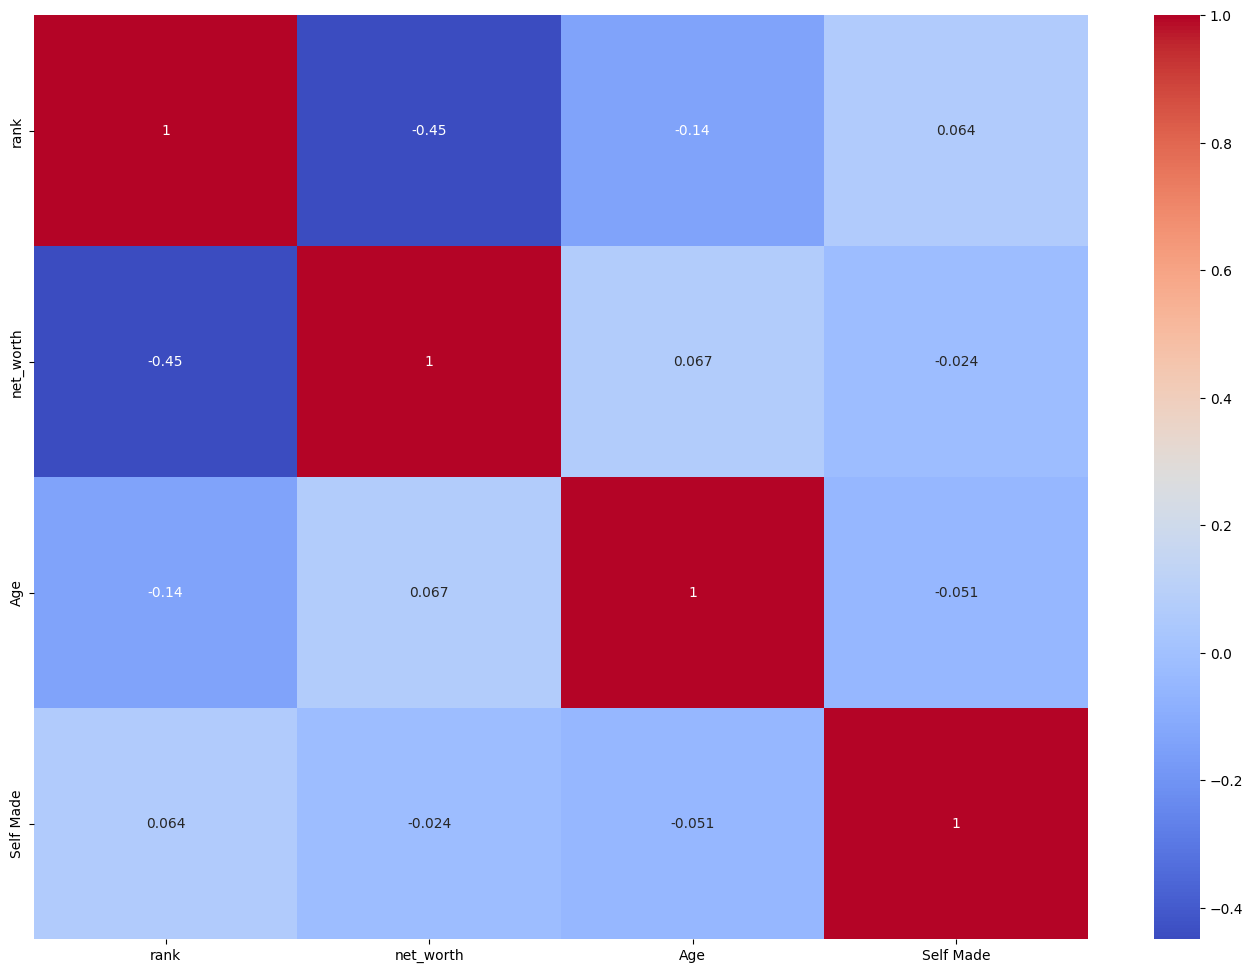

In [21]:
plt.figure(figsize=(17,12))
sns.heatmap(df[num].corr(),annot=True, cmap='coolwarm')
plt.show()

In [22]:
df['net_worth'] = boxcox(df['net_worth'])[0]

In [24]:
dict_le = {}

for i in cat:

    dict_le[i] = LabelEncoder()
    
    df[i] = dict_le[i].fit_transform(df[i])

# Targeting

In [25]:
x = df.drop('country',axis=1)
y = df.country

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=45)

In [27]:
# importing ML libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import tree

In [28]:
lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf = 1 , max_depth=200)
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()
bc = BaggingClassifier()
xgb = XGBClassifier(num_class=76)
lgbm = LGBMClassifier(force_row_wise=True)
ada = AdaBoostClassifier()
kn = KNeighborsClassifier(n_neighbors=3)

In [29]:
rn = RandomForestClassifier(    
    bootstrap=True,
    max_features=0.825,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators= 300 )

In [30]:
li = [lr,sgd,knn,gb,rn,dt,bc]
di = {}
for i in li:
    i.fit(xtrain, ytrain)
    ypred = i.predict(xtest)
    #print(i,":",r2_score(ypred,ytest)*100)
    di.update({str(i):{i.score(xtrain,ytrain)*100, i.score(xtest,ytest)*100}})

# Modeling

In [31]:
acc = pd.DataFrame(di.items(), columns=['Model', 'Values'])
acc[['Train', 'Test']] = pd.DataFrame(acc['Values'].tolist(), index=acc.index) 
acc['Model'] = acc['Model'].str.split('(', n=1).str[0]
acc.drop(columns='Values',axis=1,inplace=True)
acc.sort_values('Train',inplace=True)
acc

,Model,Train,Test
1,SGDClassifier,40.025253,41.341991
2,KNeighborsClassifier,48.214286,26.641414
0,LogisticRegression,49.747475,50.649351
4,RandomForestClassifier,96.338384,97.673160
5,DecisionTreeClassifier,97.853535,100.000000
6,BaggingClassifier,98.106061,99.783550
3,GaussianNB,99.350649,95.833333


In [32]:
fi = pd.DataFrame(dict(zip(xtrain.columns,rn.feature_importances_)).items(),columns=['features','values'])
fi.sort_values('values',ascending=False)

,features,values
9,Citizenship,0.875735
8,Residence,0.041910
11,Education,0.016582
1,name,0.014748
2,forbes_id,0.013619
7,Source of Wealth,0.009080
6,Age,0.008697
5,industry,0.005810
12,Self Made,0.004378
4,source,0.003961


# Algorithm vs Accuracy

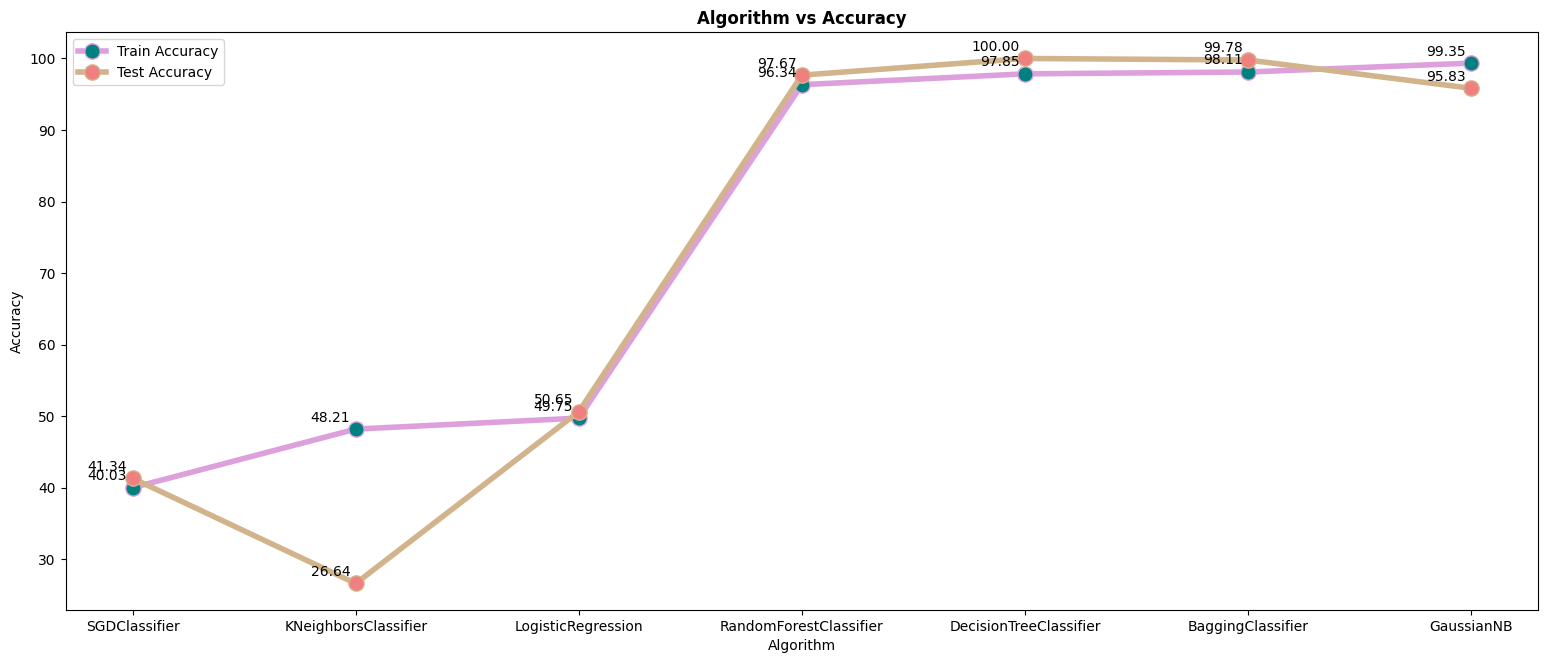

In [33]:
plt.figure(figsize=(19, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")

plt.plot(acc['Model'],acc['Train'], label='Train Accuracy', color = 'plum', marker='o', 
         linewidth=4, markersize=11, markerfacecolor='teal',)
plt.plot(acc['Model'],acc['Test'], label='Test Accuracy', color = 'tan', marker='o', 
         linewidth=4, markersize=11, markerfacecolor='lightcoral')

for i,j,k in zip(acc['Model'],acc['Train'],acc['Test']):
    label = "{:.2f}".format(j)
    plt.annotate(label,(i,j),textcoords="offset points",xytext=(-4,5.5),ha='right')
    label = "{:.2f}".format(k)
    plt.annotate(label,(i,k),textcoords="offset points",xytext=(-4,5.5),ha='right')


plt.legend()
plt.show()

In [34]:
best_model = [('lr', LogisticRegression(solver='sag')),
('dt', DecisionTreeClassifier()),
('rn', RandomForestClassifier(    
    bootstrap=True,
    max_features=0.825,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators= 300 )),
('knn', KNeighborsClassifier()),
('gb', GaussianNB()),
('bc', BaggingClassifier())]

# Stacking Classifier

* A Stacking Classifier, also known as a Stacked Ensemble or Stacking, is an ensemble machine learning technique that combines the predictions of multiple base models (learners) to create a meta-model that makes final predictions. The idea behind stacking is to leverage the strengths of different base models by training a higher-level model that learns how to best combine their predictions. This can lead to improved overall predictive performance.

* However, stacking does come with some considerations, such as increased complexity and computational cost, as it requires training multiple models. It's also important to ensure that the base models are diverse and not highly correlated for stacking to be most effective.

* Overall, stacking is a powerful technique in machine learning, often used in competitions and real-world applications to boost predictive accuracy

In [35]:
meta_regressor =  LogisticRegression(solver='sag')

Stacking_classifier = StackingClassifier(estimators=best_model, final_estimator=meta_regressor)

Stacking_classifier.fit(xtrain,ytrain)

StackingClassifier(estimators=[('lr', LogisticRegression(solver='sag')),
                               ('dt', DecisionTreeClassifier()),
                               ('rn',
                                RandomForestClassifier(max_features=0.825,
                                                       min_samples_leaf=4,
                                                       n_estimators=300)),
                               ('knn', KNeighborsClassifier()),
                               ('gb', GaussianNB()),
                               ('bc', BaggingClassifier())],
                   final_estimator=LogisticRegression(solver='sag'))

In [36]:
Stacking_classifier.score(xtrain,ytrain)*100

98.91774891774891

In [37]:
Stacking_classifier.score(xtest,ytest)*100

98.10606060606061

In [38]:
sc_val = ['Stacking_classifier', Stacking_classifier.score(xtrain,ytrain)*100, Stacking_classifier.score(xtest,ytest)*100]

In [39]:
pd.Series(sc_val)

0    Stacking_classifier
1              98.917749
2              98.106061
dtype: object

In [40]:
acc.loc[len(acc)] = sc_val

In [41]:
acc.sort_values(['Train','Test'],inplace=True)

# Stacking with StratifiedKFold


* StratifiedKFold is a cross-validation technique used in machine learning to split a dataset into multiple subsets for training and testing in a way that maintains the same class distribution in each subset. This is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the others. Stratified K-Fold cross-validation helps ensure that each fold (subset) of the data has a similar class distribution, which can lead to more reliable model evaluation.

* Stratified K-Fold is especially useful when you have imbalanced classes, as it helps prevent a situation where a particular class is underrepresented in the training or test set, which could lead to misleading evaluation results.

In [42]:
%%time

skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=1)

dic = {}
  
for train_index, test_index in skf.split(x, y):

    x_train_fold, x_test_fold = x.loc[train_index], x.loc[test_index]

    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]

    Stacking_classifier.fit(x_train_fold, y_train_fold)

    dic.update({Stacking_classifier.score(x_train_fold, y_train_fold)*100 : Stacking_classifier.score(x_test_fold, y_test_fold)*100})


CPU times: user 7min 36s, sys: 33.2 s, total: 8min 10s
Wall time: 7min 31s


In [43]:
dep = pd.DataFrame(dic.items(),columns=['Train','Test'])
l = []
for i in dep.index:
    l.append('Dataset '+str(i+1))
dep['Trial'] = l
dep[[dep.columns[2],dep.columns[0],dep.columns[1]]]

,Trial,Train,Test
0,Dataset 1,99.107143,97.159091
1,Dataset 2,99.025974,98.295455
2,Dataset 3,99.228896,98.295455
3,Dataset 4,98.863636,100.000000
4,Dataset 5,98.904221,97.159091
5,Dataset 6,99.310065,97.159091
6,Dataset 7,99.147727,96.022727


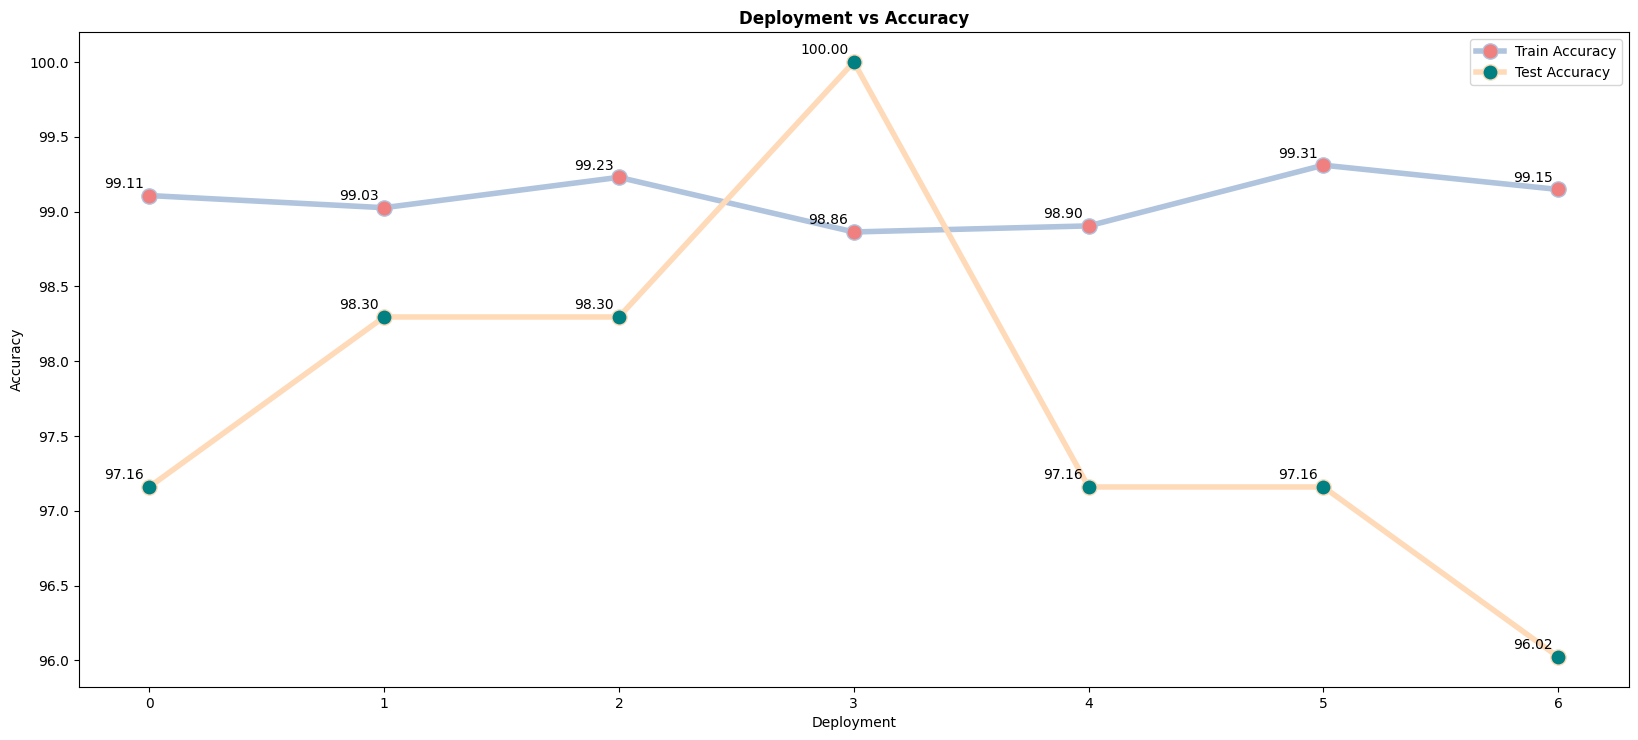

In [44]:
plt.figure(figsize=(20, 8.5))
plt.title("Deployment vs Accuracy", fontweight='bold')
plt.xlabel("Deployment")
plt.ylabel("Accuracy")

plt.plot(dep['Train'], label='Train Accuracy', color = 'lightsteelblue', marker='o', 
         linewidth=4, markersize=11, markerfacecolor='lightcoral',)
plt.plot(dep['Test'], label='Test Accuracy', color = 'peachpuff', marker='o', 
         linewidth=4, markersize=11, markerfacecolor='teal')

for i,j,k in zip(dep.index,dep['Train'],dep['Test']):
    label = "{:.2f}".format(j)
    plt.annotate(label,(i,j),textcoords="offset points",xytext=(-4,5.5),ha='right')
    label = "{:.2f}".format(k)
    plt.annotate(label,(i,k),textcoords="offset points",xytext=(-4,5.5),ha='right')

plt.legend()
plt.show()

In [45]:
sck_val = ['Stacking_with_kfold', Stacking_classifier.score(xtrain,ytrain)*100, Stacking_classifier.score(xtest,ytest)*100]
sck_val

['Stacking_with_kfold', 99.02597402597402, 98.73737373737373]

In [46]:
acc.loc[len(acc)] = sck_val

In [47]:
# Define a function to highlight the maximum value in each row
def highlight_max_in_row(row):
    is_max = row == row.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

# Apply the function to the DataFrame using the .style.apply method
styled_acc = acc.style.apply(highlight_max_in_row, axis=1, subset=['Train', 'Test'])

# Display the styled DataFrame
styled_acc

,Model,Train,Test
1,SGDClassifier,40.025253,41.341991
2,KNeighborsClassifier,48.214286,26.641414
0,LogisticRegression,49.747475,50.649351
4,RandomForestClassifier,96.338384,97.673160
5,DecisionTreeClassifier,97.853535,100.000000
6,BaggingClassifier,98.106061,99.783550
7,Stacking_classifier,98.917749,98.106061
3,GaussianNB,99.350649,95.833333
8,Stacking_with_kfold,99.025974,98.737374



Despite encountering challenges such as outliers, overfitting concerns, and imbalanced target feature classes, several techniques have been employed to address these issues. Specifically, I utilized a Stacking Classifier to incorporate multiple algorithms, resulting in improved predictions. Additionally, by implementing StratifiedKFold to partition the dataset, I achieved significantly enhanced prediction accuracy, reaching an impressive 99%, all while effectively mitigating the risk of overfitting.

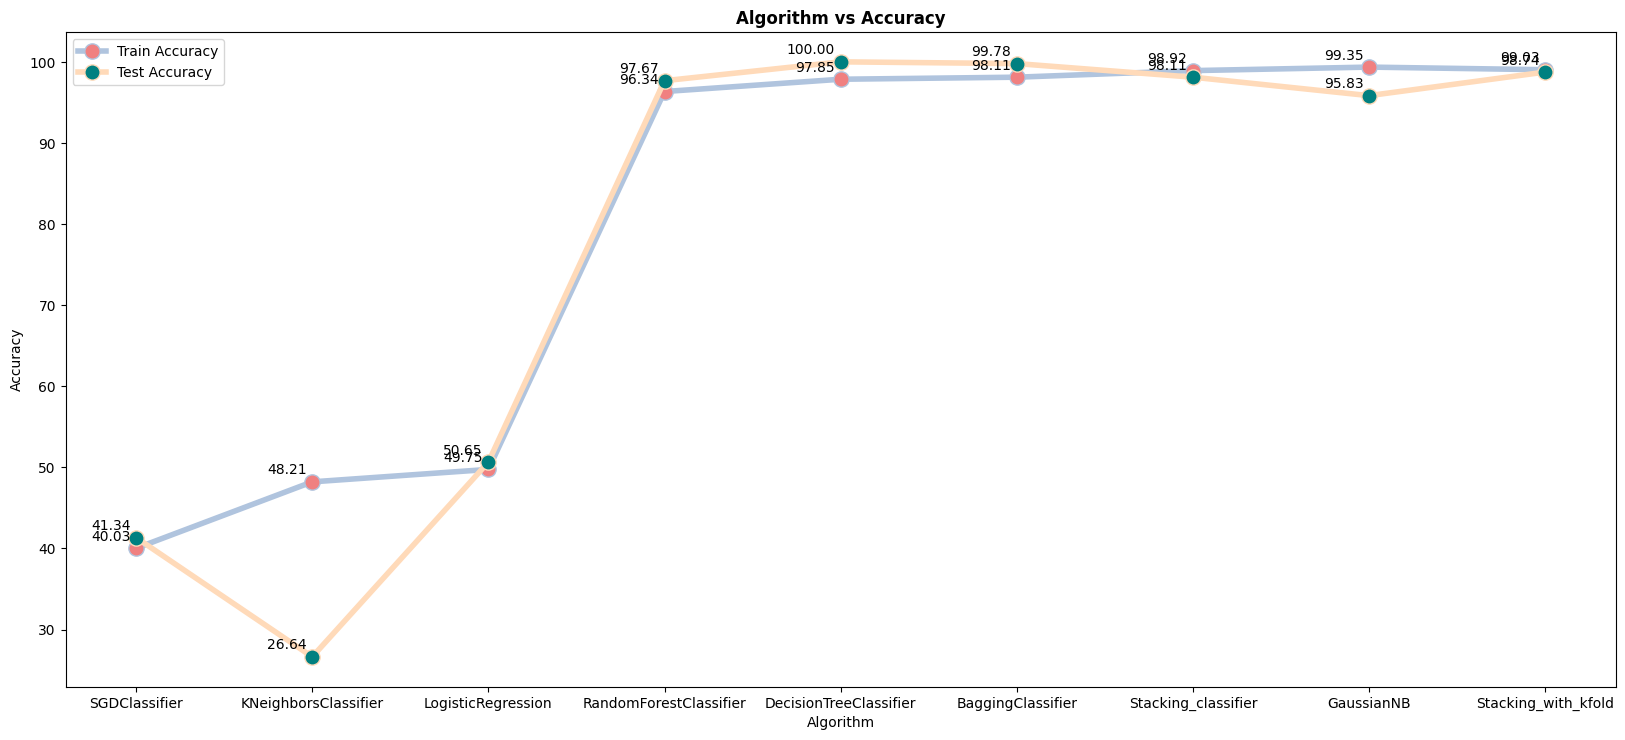

In [48]:
plt.figure(figsize=(20, 8.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")

plt.plot(acc['Model'],acc['Train'], label='Train Accuracy', color = 'lightsteelblue', marker='o', 
         linewidth=4, markersize=11, markerfacecolor='lightcoral',)
plt.plot(acc['Model'],acc['Test'], label='Test Accuracy', color = 'peachpuff', marker='o', 
         linewidth=4, markersize=11, markerfacecolor='teal')

for i,j,k in zip(acc['Model'],acc['Train'],acc['Test']):
    label = "{:.2f}".format(j)
    plt.annotate(label,(i,j),textcoords="offset points",xytext=(-4,5.5),ha='right')
    label = "{:.2f}".format(k)
    plt.annotate(label,(i,k),textcoords="offset points",xytext=(-4,5.5),ha='right')

plt.legend()
plt.show()

In [50]:
stack_pred = Stacking_classifier.predict(df.drop('country',axis=1))
gb_pred = gb.predict(df.drop('country',axis=1))
rn_pred = rn.predict(df.drop('country',axis=1))

In [51]:
df['stack_pred'] = stack_pred
df['gb_pred'] = gb_pred
df['rn_pred'] = rn_pred

In [52]:
print('Wrongly predicted values:',len(df[df['country'] != df['stack_pred']]),', Out of:', len(df))

Wrongly predicted values: 28 , Out of: 2640


In [57]:
print('Percentage of correctly predicted values:', round((len(df)-len(df[df['country'] != df['stack_pred']]))/len(df)*100,2))

Percentage of correctly predicted values: 98.94


In [54]:
for i in cat:
    df[i] = dict_le[i].inverse_transform(df[i])

In [55]:
df['stack_pred'] = dict_le['country'].inverse_transform(df['stack_pred'])
df['gb_pred'] = dict_le['country'].inverse_transform(df['gb_pred'])
df['rn_pred'] = dict_le['country'].inverse_transform(df['rn_pred'])

In [56]:
df[['country','stack_pred','gb_pred','rn_pred']].to_csv('countries_predicted.csv')